# Handwriting Recognition using K-Means

K-Means is a clustering algorithm that helps to classify things based on where they end up on the low dimensional representation plane after dimensionality reduction.  

Using K-Means to develop an algorithm to recognize hand writing, with help from scikit-learn.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
 
digits = datasets.load_digits()

First, let's learn about the data we are working with.

In [3]:
#print(digits)
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
print(digits.target)

[0 1 2 ... 8 9 8]


digits.data is the data we will be training the model on and digits.target is the label for each respective piece of data in digits.data.

We can use matplotlib to visualize the vectors and see what digit each vector represents. Let's see what the image at index 100 is:

<Figure size 432x288 with 0 Axes>

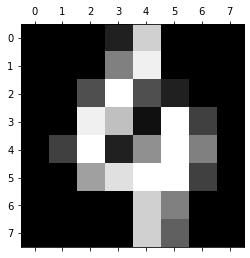

4


In [7]:
plt.gray() 
 
plt.matshow(digits.images[100])
 
plt.show()

print(digits.target[100])

It's a 4!

Now it's time to get started with K-Means and cluster the data into groups.

In [8]:
from sklearn.cluster import KMeans

The number of clusters we're expecting is 10, as there are 10 digits: (0, 1, 2, 3, 4, 5, 6, 7, 8, and 9). The second parameter in the function call for random_state just ensures that each time we run the code, the model is constructed the same way.

In [10]:
model = KMeans(n_clusters=10,random_state=42)
model.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Let’s visualize all the centroids (result after KMeans)! Because data samples live in a 64-dimensional space, the centroids have values so they can be images!

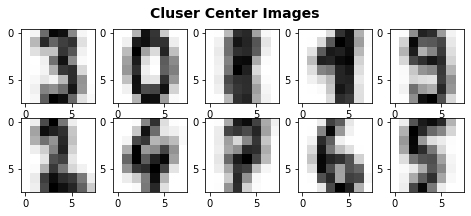

In [14]:
fig = plt.figure(figsize=(8, 3))
 
fig.suptitle('Cluser Center Images', fontsize=14, fontweight='bold')


for i in range(10):
 
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
 
  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()

Let's see if the model can predict my handwriting. I wrote and converted the number 2031 into it's vectorized form.



In [19]:
new_samples = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.28,4.78,5.33,4.33,0.00,0.00,0.00,0.00,6.62,5.08,2.50,6.85,2.96,0.00,0.00,0.00,1.14,0.07,0.00,4.56,3.80,0.00,0.00,0.00,0.00,0.00,0.00,5.40,3.73,0.00,0.00,0.00,0.00,0.00,2.35,7.31,0.83,0.00,0.00,0.00,2.04,5.39,7.54,6.00,3.73,0.45,0.00,0.00,1.97,3.81,3.81,3.80,3.80,0.45],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,4.93,6.86,7.39,5.78,0.15,0.00,0.00,4.02,6.47,1.35,0.83,7.00,1.97,0.00,0.00,7.08,1.89,0.00,0.00,6.40,2.13,0.00,0.00,7.61,0.76,0.00,1.21,7.54,0.75,0.00,0.00,6.54,5.23,1.97,6.62,4.25,0.00,0.00,0.00,0.60,5.47,6.10,4.10,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,4.34,4.57,4.42,0.45,0.00,0.00,0.00,0.15,3.58,3.05,6.71,2.05,0.00,0.00,0.00,0.00,0.00,2.04,7.31,1.52,0.00,0.00,0.00,0.00,3.87,7.62,7.38,1.06,0.00,0.00,0.00,0.00,0.30,0.76,5.79,2.81,0.00,0.00,0.00,0.46,3.20,1.60,6.09,3.04,0.00,0.00,0.00,0.91,6.09,6.10,5.55,0.68,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.35,2.81,0.00,0.00,0.00,0.00,0.00,0.00,3.81,4.57,0.00,0.00,0.00,0.00,0.00,0.00,3.81,4.57,0.00,0.00,0.00,0.00,0.00,0.00,3.81,4.57,0.00,0.00,0.00,0.00,0.00,0.00,3.80,4.56,0.00,0.00,0.00,0.00,0.00,0.00,4.18,4.49,0.00,0.00,0.00,0.00,0.00,0.00,1.98,1.52,0.00,0.00,0.00]
])

In [20]:
new_labels = model.predict(new_samples)
 
print(new_labels) 

[4 6 4 7]



But wait, because this is a clustering algorithm, we don’t know which label is which.

By looking at the cluster centers, let’s map out each of the labels with the digits we think it represents:

In [21]:
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

6465

It seems the data that the model was trained on is inaccurate. Thereby with faulty data comes a faulty classification model.  